In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import simulate
import plotting

In [2]:
def plot_mean_and_confidence(plot_range, mean, mean_label, confidence_interval, 
                             confidence_interval_title):
    """
    Plot the mean and some kind of confidence interval (standard deviation or
    mean-squared-error)
    
    Parameters:
    ----------
    plot_range: iterable
    mean: an iterable
        the mean of the values at that point
    confidence_interval: an iterable
        Representing the  interval of confidence in that point. 
        The iterable should have length plot_range.
    confidence_interval_title: a string
    
    """
    
    lower_bound = np.array(mean)-np.array(confidence_interval)
    upper_bound = np.array(mean)+np.array(confidence_interval)
    plt.plot(plot_range, mean, label=mean_label)
    plt.fill_between(plot_range, lower_bound, upper_bound, 
                     label='{}'.format(confidence_interval_title),
                     alpha=0.2)

def plot_results(*args, **kwargs):
    """plot results from simulations
    
    Parameters:
        args: 1 or more dicts. The dicts should have for the keys numerical
            input values and for the values iterables of numbers.
        kwargs: at least the arguments xlabel, ylabel, title
        
    """
    for argument in args:
        data, meta_dict = argument
        variable_range, mean, std, batches_std = (
            find_mean_std_mse(data, 10)
        )
        
        if kwargs['std_of_batches']: 
            plot_mean_and_confidence(variable_range, mean, meta_dict['mean_label'], 
                                     batches_std, "batches stdev")
        else:
            plot_mean_and_confidence(variable_range, mean, meta_dict['mean_label'], 
                                     std, "stdev")
    
    plt.xlabel(kwargs['xlabel'])
    plt.ylabel(kwargs['ylabel'])
    plt.legend()
    plt.title(kwargs['title'])
    plt.show()


### First load the data

#### Relation MI and nudge impact for 1 input and 1 output 

In [3]:
FILE_PATH = "relation_MI_nudge_impact_1input.json"
with open(FILE_PATH, 'r') as f:
    data_dict = json.load(f)

In [4]:
plot_range, mean, std, batches_std = simulate.find_mean_std_mse(
    data_dict, batch_size = 1
)
plot_range = [float(item) for item in plot_range]
#print(mean)
#print(std)

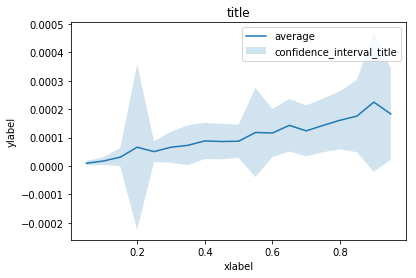

In [5]:
plotting.plot_mean_and_confidence(plot_range, mean, std, 
                                  "confidence_interval_title", "xlabel", "ylabel", "title")

#### Maximum impact for individual, local, and global nudges for increasing number of variables

In [6]:
with open("max_impact_individual_nudges_dirichlet_first100samples.json", 'r') as f:
    max_individual_impact_dict = json.load(f)

with open("max_impact_local_nudges_dirichlet.json", 'r') as f:
    max_local_impact_dict = json.load(f)

with open("max_impact_global_nudges_dirichlet_first200samples.json", 'r') as f:
    max_global_impact_dict = json.load(f)

In [7]:
plot_range_individual, mean_individual, std_individual, batches_std_individual = simulate.find_mean_std_mse(
    max_individual_impact_dict, batch_size = 1
)
plot_range_individual = [float(item) for item in plot_range_individual]

plot_range_local, mean_local, std_local, batches_std_local = simulate.find_mean_std_mse(
    max_local_impact_dict, batch_size = 1
)
mean_local = np.array(mean_local)*-1 
mean_local = list(mean_local)
plot_range_local = [float(item) for item in plot_range_local]

plot_range_global, mean_global, std_global, batches_std_global = simulate.find_mean_std_mse(
    max_global_impact_dict, batch_size = 20
)
plot_range_global = [float(item) for item in plot_range_global]

print(mean_local)


[0.0038854586798971443, 0.0018465311860913385, 0.00087843858051301986, 0.00042286575962755657]


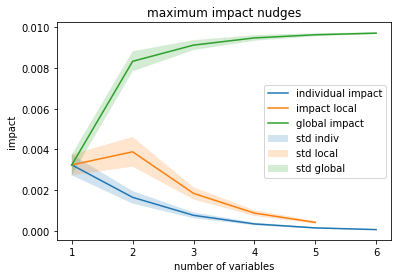

In [8]:
plot_range_local.insert(0, 1)
mean_local.insert(0, mean_individual[0])
std_local.insert(0, std_individual[0])
batches_std_local.insert(0, batches_std_individual[0])
plot_range_global.insert(0, 1)
mean_global.insert(0, mean_individual[0])
std_global.insert(0, std_individual[0])
batches_std_global.insert(0, batches_std_individual[0])

plot_mean_and_confidence(plot_range_individual, mean_individual, "individual impact", 
                         std_individual, "std indiv")

plot_mean_and_confidence(plot_range_local, mean_local, "impact local", 
                         std_local, "std local")

plot_mean_and_confidence(plot_range_global, mean_global, "global impact", 
                         std_global, "std global")


plt.xlabel('number of variables')
plt.ylabel('impact')
plt.legend()
plt.title('maximum impact nudges')
plt.show()

